<a href="https://colab.research.google.com/github/m22ai663/Fractal3AssignemntP3/blob/main/Problem_3_Chart_Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSL7020: Machine Learning-1
# Semester II, 2022-202
# Fractal-3 Assignment

---

*  #### Name: Bijesh P V
*  #### ID: M22Ai663
*  #### M.Tech DCS Exceutive Batch 2022-24

---
Code Link : https://colab.research.google.com/drive/1wkH5xjZq_9DqyV9PzjqantoKgcv6-awV?usp=sharing

## Problem 3: Chart Image Classification using CNN

#### Problem statement: You have to develop a CNN based classification architecture for classifying a given chart image to one of five chart classes, namely “Line”,“Dot Line”,“Horizontal Bar”,“Vertical Bar”, and “Pie” chart.

* Task 1: Download the dataset from drive link given below.
Dataset link
Use train and val images for training and validation in an appropriate ratio (e.g., 80% for
training and 20 % for validating). The CSV file contains corresponding labels for the images.
* Task 2: Implement a two-layer Convolutional Neural Network, and calculate accuracy,
loss and plot the obtained loss. Briefly write your observation and submit your code so that
we can4 evaluate your implementation at our end.
*Task 3: Finetune a pretrained network (e.g., AlexNet) for this task and report the results.

In [61]:
import pandas as pd
import cv2
from keras.layers import Dense, Flatten
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Authenticate user
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

# Set data path
data_path = '/content/drive/My Drive/Classes/CSL7020 Machine Learning-1/Fractal-3 Assignment/Problem 3/charts/'
train_val_csv = pd.read_csv(data_path+"train_val.csv")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [63]:
def load_images_and_labels(path):
    images = []
    labels = []
    for filename in os.listdir(path):
        if filename.endswith('.png'):
            # Load the images and resize them to (128, 128) with 3 color channels
            img = cv2.imread(os.path.join(path, filename))
            img = cv2.resize(img, (128, 128))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_array = np.array(img)
            # Append the array to the list of images
            images.append(img_array)
            labels.append(filename)
    # Convert the string labels to numerical labels
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    # Convert the lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)
    # Save the arrays in NumPy format
    np.save('x.npy', images)
    np.save('y.npy', labels)
    x = np.load('x.npy')
    y = np.load('y.npy')
    return x, y

# Load training dataset in numpy array
x_train, y_train = load_images_and_labels(data_path + "train_val")

# Load test dataset in numpy array
x_test, y_test = load_images_and_labels(data_path + "test")


In [64]:
x_train.shape

(1000, 128, 128, 3)

In [65]:
x_train[:5]
y_train[:5]

array([0, 1, 2, 3, 4])

In [66]:
x_test.shape

(50, 128, 128, 3)

In [68]:
x_test[:2]
x_test[:2]

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

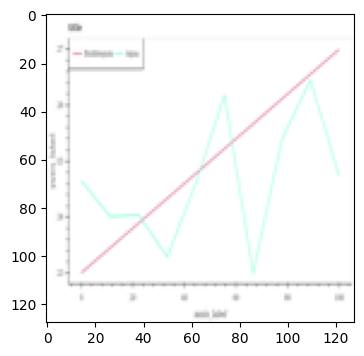

In [69]:
plt.figure(figsize = (16,4))
plt.imshow(x_train[20])
plt.imshow(x_train[228])
plt.imshow(x_train[444])

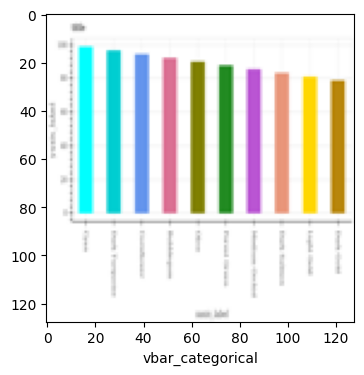

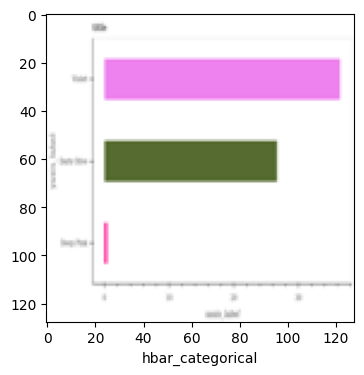

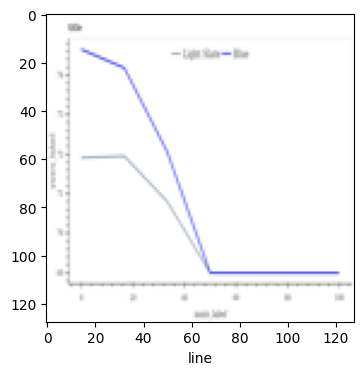

In [73]:
# define some classes from the images we have observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_csv['type']])
y_train
y_train.shape
y_test.shape
def image_sample(x, y, index):
  plt.figure(figsize = (16,4))
  plt.imshow(x[index])
  plt.xlabel(image_classes[y[index]])
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,228)
image_sample(x_train,y_train,440)

In [74]:
# normalize the image
# x_train[0]/255
x_train=x_train /255
x_test=x_train /255
x_test.shape
y_train_index = train_val_csv['image_index']
y_train_type = train_val_csv['type']
y_train_type[:5]

0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [76]:
# writing a simple nn to test first to get the  model architecture
model = Sequential([
Flatten(input_shape=(128,128,3)),
Dense(3000, activation='relu'),
Dense(1000, activation='relu'),
Dense(5, activation='softmax')
])
# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=12)

Epoch 1/12
32/32 [==============================] - 33s 977ms/step - loss: 6.6356 - accuracy: 0.1790
Epoch 2/12
32/32 [==============================] - 30s 921ms/step - loss: 1.6253 - accuracy: 0.2040
Epoch 3/12
32/32 [==============================] - 29s 921ms/step - loss: 1.6117 - accuracy: 0.2380
Epoch 4/12
32/32 [==============================] - 29s 922ms/step - loss: 1.5953 - accuracy: 0.2510
Epoch 5/12
32/32 [==============================] - 29s 925ms/step - loss: 1.6042 - accuracy: 0.2620
Epoch 6/12
32/32 [==============================] - 30s 927ms/step - loss: 1.5815 - accuracy: 0.2800
Epoch 7/12
32/32 [==============================] - 31s 989ms/step - loss: 1.5717 - accuracy: 0.2430
Epoch 8/12
32/32 [==============================] - 30s 926ms/step - loss: 1.5793 - accuracy: 0.2740
Epoch 9/12
32/32 [==============================] - 30s 927ms/step - loss: 1.5844 - accuracy: 0.2530
Epoch 10/12
32/32 [==============================] - 30s 928ms/step - loss: 1.5720 - accura

In [77]:
# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
model.evaluate(x_test,y_test)

7/7 [==============================] - 4s 423ms/step - loss: 1.8555 - accuracy: 0.1850


[1.8554556369781494, 0.1850000023841858]

In [78]:
y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]

7/7 [==============================] - 2s 241ms/step


In [79]:
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)

Train Images Shape: (800, 128, 128, 3)
Train Labels Shape: (800,)
Test Images Shape: (200, 128, 128, 3)
Test Labels Shape: (200,)


Epoch 1/50
1/1 [==============================] - 18s 18s/step - loss: 1.6242 - accuracy: 0.2037 - val_loss: 2.0641 - val_accuracy: 0.1900
Epoch 2/50
1/1 [==============================] - 15s 15s/step - loss: 2.0004 - accuracy: 0.2025 - val_loss: 1.6618 - val_accuracy: 0.2200
Epoch 3/50
1/1 [==============================] - 22s 22s/step - loss: 1.6959 - accuracy: 0.1950 - val_loss: 1.6173 - val_accuracy: 0.2250
Epoch 4/50
1/1 [==============================] - 14s 14s/step - loss: 1.6396 - accuracy: 0.1988 - val_loss: 1.5944 - val_accuracy: 0.2450
Epoch 5/50
1/1 [==============================] - 14s 14s/step - loss: 1.6059 - accuracy: 0.1925 - val_loss: 1.5845 - val_accuracy: 0.2700
Epoch 6/50
1/1 [==============================] - 14s 14s/step - loss: 1.5846 - accuracy: 0.2188 - val_loss: 1.5868 - val_accuracy: 0.2900
Epoch 7/50
1/1 [==============================] - 13s 13s/step - loss: 1.5729 - accuracy: 0.3375 - val_loss: 1.5778 - val_accuracy: 0.3450
Epoch 8/50
1/1 [===========

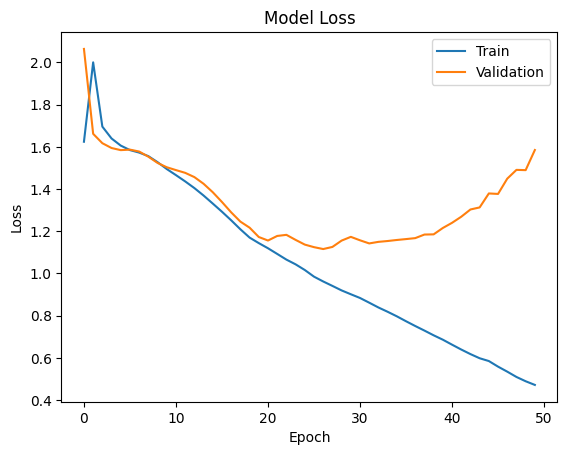

In [80]:
cnn_model = Sequential([
  Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, (3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(64, (3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(5, activation='softmax')
])
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))
# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

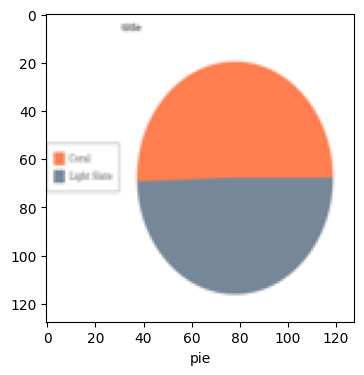

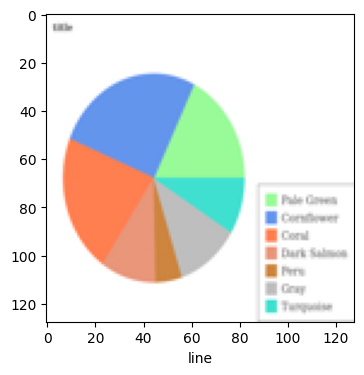

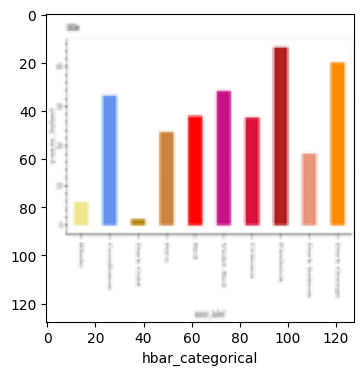

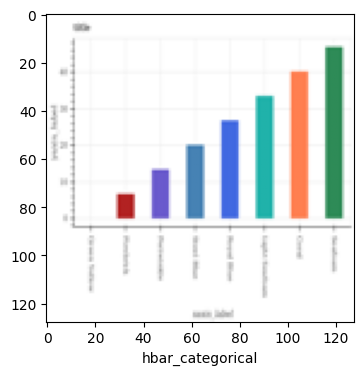

In [81]:
image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)

In [82]:
y_pred = cnn_model.predict(x_test)
y_pred[:5]

7/7 [==============================] - 1s 185ms/step


array([[5.2349937e-01, 2.1501642e-01, 1.8797851e-01, 3.4565378e-03,
        7.0049055e-02],
       [4.5587987e-01, 3.4699489e-03, 1.6247775e-02, 7.7842072e-02,
        4.4656017e-01],
       [3.5790244e-01, 2.1387794e-05, 3.2887466e-03, 3.9919270e-03,
        6.3479549e-01],
       [8.5194868e-01, 1.4143698e-06, 2.1883701e-03, 1.7921243e-02,
        1.2794022e-01],
       [6.5330577e-01, 8.6178012e-02, 1.9537659e-01, 1.6454133e-03,
        6.3494191e-02]], dtype=float32)

In [83]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 0, 4, 0, 0]

In [84]:
y_test[:5]

array([0, 4, 4, 4, 0])

'dot_line'

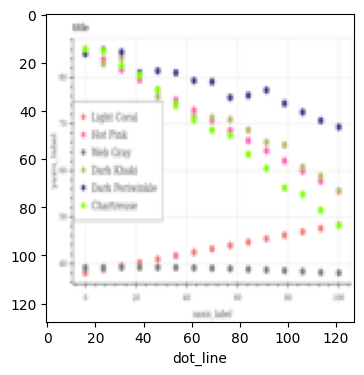

In [85]:
image_sample(x_test,y_test,15) #actual
image_classes[y_classes[15]] #predicted

In [86]:
report = classification_report(y_test, y_classes)
print("Classification report:\n", report)

Classification report:
               precision    recall  f1-score   support

           0       0.46      0.59      0.52        37
           1       0.85      0.77      0.81        44
           2       0.71      0.35      0.47        48
           3       0.43      0.70      0.53        33
           4       0.63      0.58      0.60        38

    accuracy                           0.59       200
   macro avg       0.62      0.60      0.59       200
weighted avg       0.63      0.59      0.59       200



In [87]:
conf_mat = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[22  4  1  2  8]
 [ 3 34  0  6  1]
 [11  1 17 19  0]
 [ 0  1  5 23  4]
 [12  0  1  3 22]]


Text(120.72222222222221, 0.5, 'Actual')

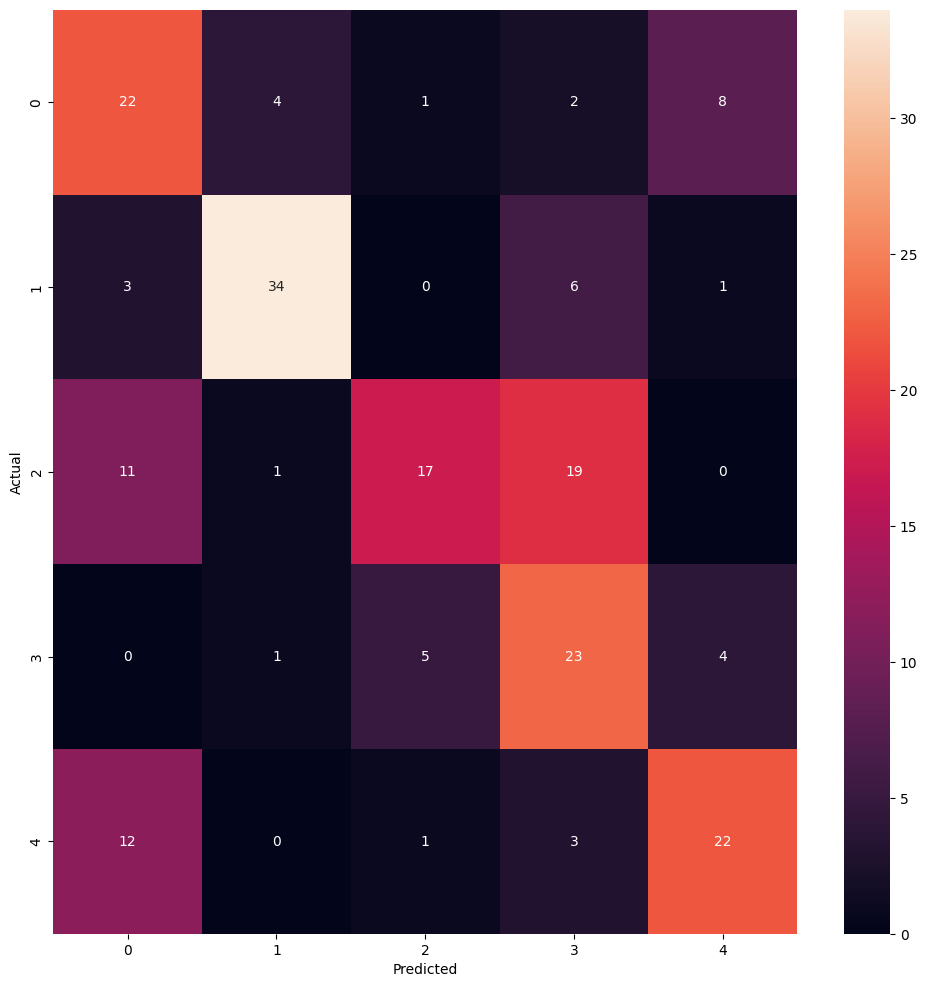

In [88]:
# Plot confusion matrix
import seaborn as sn
plt.figure(figsize = (12,12))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [89]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the pre-trained model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [91]:
# Replace the final classification layer with a new layer
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)
# Freeze the weights of all layers except the new classification layer
for layer in pt_model.layers:
  layer.trainable = False
# Compile the model with categorical crossentropy loss and Adam optimizer
pt_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Print the summary of the model architecture
pt_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   